# Extrovert vs Introvert Behavior Data

**Goal**

In this project, we address a binary classification problem focused on predicting an individual’s personality type. Specifically, the task is to determine whether a person is more likely to be an extrovert or an introvert, based on a set of behavioral and social features. To achieve this, we trained and evaluated five different machine learning models, comparing their performance in order to identify which approaches are most effective.



**What we will see:**
- Dataset exploration
- Data processing
	- Duplicates
	- Encoding target
	- Imputing missing values
	- Encoding categorical features
- Splitting
- Feature engineering
- Scaling
- Training
- Testing
- Feature Importance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
import shap
import math

## Load the Dataset

In [ ]:
df = pd.read_csv('personality_dataset.csv')

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## Exploring the data

In [ ]:
# Displaying the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


**Features**
- **Numerical Features:**
	- **Time_spent_Alone**:
      - This feature represents the **number of hours a person spends alone each day**.
      - The values range from 0 to 11
        - with 0 meaning the person spends no time alone and 11 being the maximum reported time.
	- **Social_event_attendance**:
        - This feature measures the **frequency with which a person attends social events**.
        - The scale is from 0 to 10
          - with higher numbers indicating more frequent attendance.
    - **Going_outside**:
        - This feature indicates how **frequently a person goes outside**.
        - The values range from 0 to 7
          - likely corresponding to the number of days a week or a similar frequency scale.
          - A higher value suggests a more active lifestyle and more engagement with the external world.
    - **Friends_circle_size**:
        - This feature represents the **size of a person's close friends circle**.
        - The number of friends ranges from 0 to 15.
    - **Post_frequency**:
        - This feature measures how **often a person posts on social media**.
        - The scale is from 0 to 10.
          - Higher numbers suggest more public sharing and a greater presence on social platforms.
- **Categorical Features**
	- **Stage_fear**:
        - This is a **binary feature** that indicates the presence of stage fright.
        - The values are "Yes" or "No".
	- **Drained_after_socialising**:
        - This is another **binary feature** that captures a person's feelings after social interactions.
        - The values are "Yes" or "No". A "Yes" response suggests that social activities are energetically draining, a common trait in introverted people. A "No" response implies that socialising is energising or at least not draining.


- **Target**
    - Personality: Target variable (Extrovert/Introvert)


In [ ]:
numerical_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_columns = ['Stage_fear', 'Drained_after_socializing']

In [ ]:
df.shape

(2900, 8)

In [ ]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


Based on the table, we can see there are some missing values. Let's examine them more closely.

In [ ]:
# Checking for missing values
print("Missing values per column:")
display(df.isnull().sum())

print('Number of missing values in the dataset:')
print(df.isna().sum().sum())
print('Percentage:', df.isna().sum().sum()/df.size*100)

Missing values per column:


,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


Number of missing values in the dataset:
458
Percentage: 1.9741379310344827


In [ ]:
before_row, before_col = df.shape
print(before_row, before_col)
after_df = df.dropna()
after_row, after_col = after_df.shape
print(after_row, after_col)
print('Rows dropped:', before_row - after_row)
print('Percentage of rows:', (before_row - after_row)/before_row*100)

2900 8
2477 8
Rows dropped: 423
Percentage of rows: 14.586206896551722


In [ ]:
df.shape

(2900, 8)

Even though only 1.97% of values are missing overall, those missing values are spread across rows.

Dropping rows means we would lose 14.6% of the dataset, which is quite costly.

Losing 423 participants out of 2900 may reduce statistical power and model performaces.

So, we decided to address them in a different way, imputing them with two different methods to determine the most effective approach.

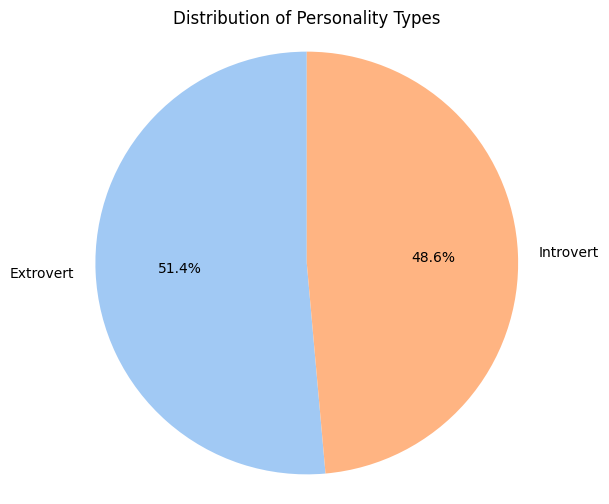

In [ ]:
# Distribution of Personality Types
personality_counts = df['Personality'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(personality_counts, labels=personality_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Personality Types')
plt.axis('equal')
plt.show()

Our target distribution is well-balanced, with:
- 51,4% Extroverts
- 48,6% Introverts


Because the classes are nearly equal in size, we can expect that our models will not be biased toward a specific personality type.

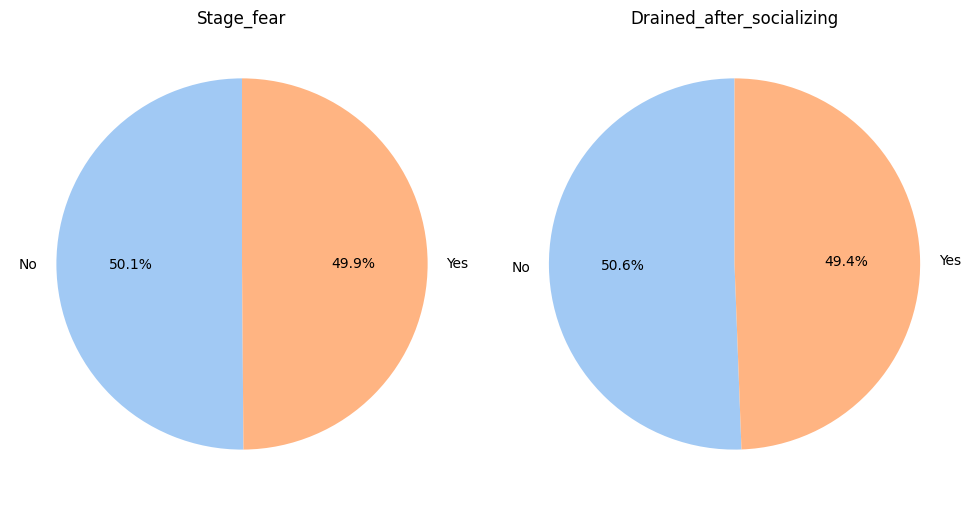

In [ ]:
# Pie charts for the categorical columns

n_cols = 2
n_rows = 1

fig,axes = plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*5))
for i,col in enumerate(categorical_columns):
    df[col].value_counts().plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel'),
        startangle=90,
    )
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

We can observe that our categorical features also exhibit a balanced distribution.

This initial finding, combined with our domain knowledge, leads us to hypothesize a potential correlation between these features and our target variable.

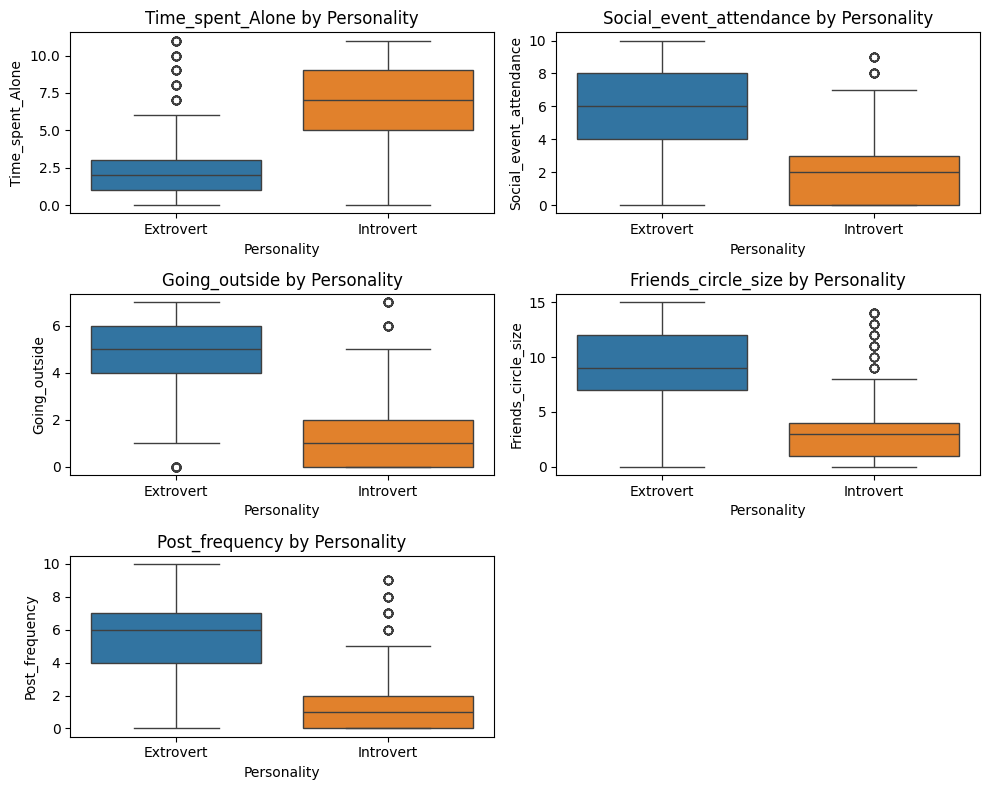

In [ ]:
plt.figure(figsize=(10, 8))
custom_palette = ["blue", "orange"]
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df['Personality'], y=col, data=df, hue="Personality")
    plt.title(f'{col} by Personality')
plt.tight_layout()
plt.show()

In [ ]:
# check the outliers
df_z = df[numerical_columns].apply(zscore)
outliers = (df_z.abs() > 3).sum()
print(f"Outlier counts: (z-score > 3):\n{outliers}")

Outlier counts: (z-score > 3):
Time_spent_Alone           0
Social_event_attendance    0
Going_outside              0
Friends_circle_size        0
Post_frequency             0
dtype: int64


In [ ]:
def detect_outliers_iqr(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)).sum()
        outlier_counts[col] = outliers
    return outlier_counts

iqr_outliers = detect_outliers_iqr(df, numerical_columns)
print("IQR outliers:")
for col, value in iqr_outliers.items():
  print(f"{col}: {value}")

IQR outliers:
Time_spent_Alone: 0
Social_event_attendance: 0
Going_outside: 0
Friends_circle_size: 0
Post_frequency: 0


- Boxplot visualization shows some data points are plotted individually beyond the whiskers, which might initially appear as outliers.

- However, detailed statistical analysis using both IQR and Z-score methods confirms these are not statistically significant outliers.

- This **occurs** because personality survey data uses discrete scales with limited unique values (8-16 per feature), causing the boxplot algorithm to display extreme but normal responses as separate points.

- All data points represent legitimate behavioral variation and should be retained for model training.

In [ ]:
# checking for skewenes
skewness = df[numerical_columns].skew(skipna=True)
print(f"Skewness of numerical features:\n{skewness.sort_values(ascending=False)}")

Skewness of numerical features:
Post_frequency             0.474510
Friends_circle_size        0.425051
Time_spent_Alone           0.385821
Social_event_attendance    0.294742
Going_outside              0.192891
dtype: float64


- Our five numerical features show skewness values ranging from 0.19 to 0.47, well within the "approximately symmetric" threshold (|skewness| < 0.5).

- The mild right-skewness observed is characteristic of personality survey data, where most respondents cluster around moderate values with fewer individuals at behavioral extremes.

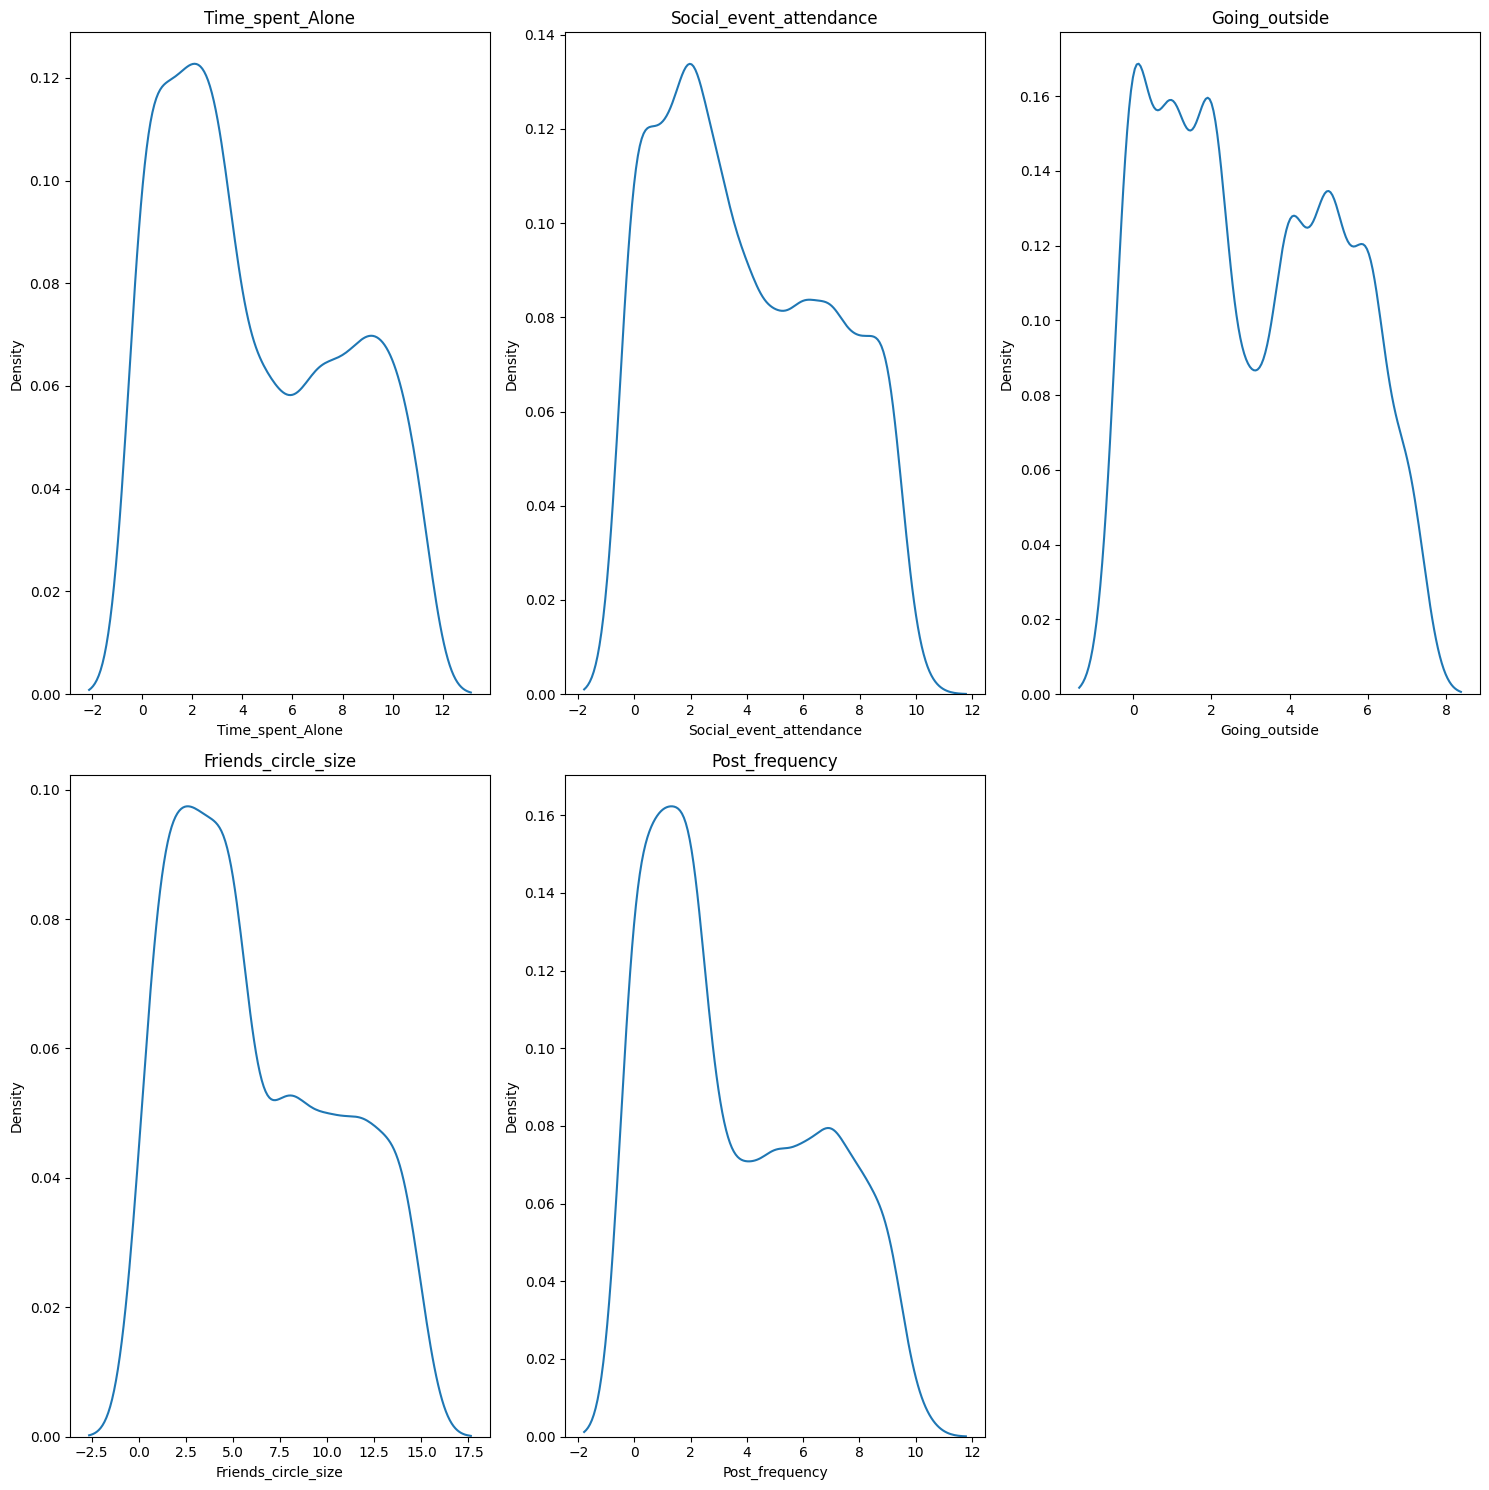

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(f"{col}")

axes[5].set_visible(False)

plt.tight_layout()
plt.show()

- The density plots reveal bimodal distributions in most features, reflecting natural clustering between introverts and extroverts.

- We can see that they are not skewed, instead they are multimodal. We can see two peaks.

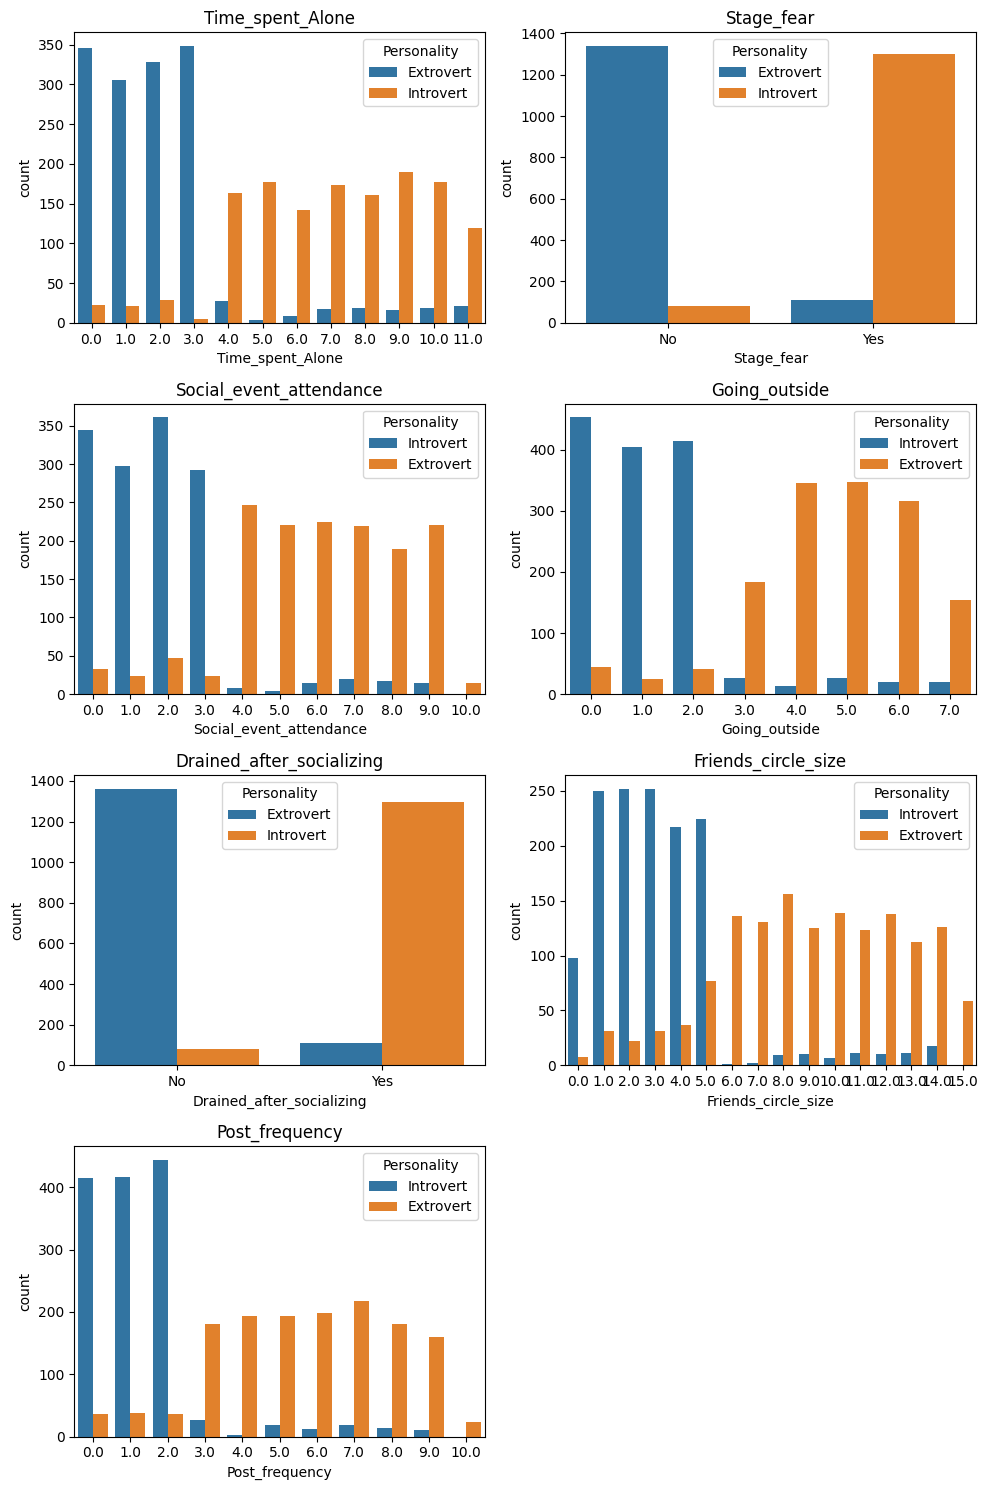

In [ ]:
categorical_cols = df.columns[:-1]
categorical_cols

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,15))

axes = axes.flatten()
for ax, col in zip(axes, categorical_cols):
  df[col] = df[col].round()
  sns.countplot(df, x=col, ax=ax, hue='Personality')
  ax.set_title(col)

axes[7].set_visible(False)

plt.tight_layout()
plt.show()


The plots reveal distinct behavioral patterns:

Extroverts:
- spend less time alone
- attend more social events
- show minimal stage fear or social exhaustion

Introverts:
- more likely to spend time alone
- have smaller groups of friends
- experience stage fear
- feel drained after interactions

**Mirroring**:

Digital behavior mirrors real life behavior, with extroverts posting more frequently and introverts remaining less active.

**Overlap**:

Overlap is expected because personality is not binary but continuous and individual behaviors fall along a spectrum rather than into discrete categories.

**Spectrum**:

Introverts appear more homogeneous, while extroverts display a wider behavioral spectrum across social attendance, posting frequency and circle size. On the other hand, the inverse is valid for "Time spent alone", here extroverts have a wider spectrum.

This suggests two important insights:
- Based on our data, introversion is more uniform in social contexts, while extrovers have a wider spectrum.
- **Maybe** our dataset emphasizes interpersonal and social engagement metrics. We capture the natural domain where extroverts show flexibility and variation. The inverse pattern for "Time spent alone" suggests that introverts might display a wider range in domains we haven't measured.

Overall, we started to think of some possible correlation between personality and Stage_fear and Drained_after_socializing.


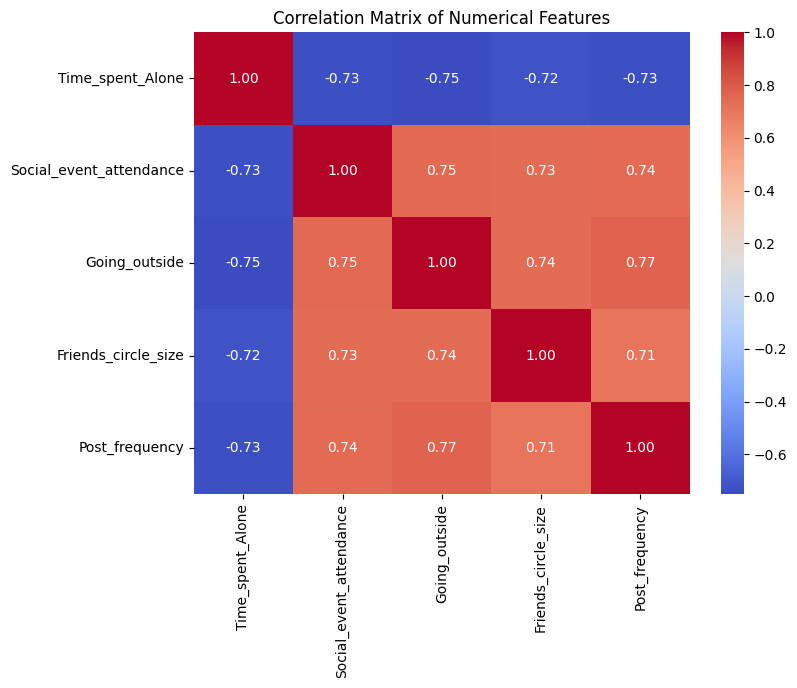

In [ ]:
# Creating a correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()



**Strong Negative Correlations (Deep Blue):**

'Time_spent_Alone' has strong negative correlations with:
- 'Social_event_attendance' (-0.73)
- 'Going_outside' (-0.75)
- 'Friends_circle_size' (-0.72)
- 'Post_frequency' (-0.73)

This makes intuitive sense: people who spend more time alone tend to spend less time on social activities, going outside, have smaller friend circles, and post less.

**Strong Positive Correlations (Deep Red):**

'Social_event_attendance' has strong positive correlations with:
- 'Going_outside' (0.75)
- 'Friends_circle_size' (0.73)
- 'Post_frequency' (0.74)

This also aligns with expectations: people who attend more social events are likely to go outside more, have larger friend circles, and be more active on social media.

'Going_outside' is strongly positively correlated with:
- 'Friends_circle_size' (0.74)
- 'Post_frequency' (0.77)

'Friends_circle_size' is strongly positively correlated with:
- 'Post_frequency' (0.71)

**Summary**:
- The correlation matrix reveals significant relationships among the numerical features
- Features related to social interaction ('Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency') are strongly positively correlated with each other
- While 'Time_spent_Alone' is strongly negatively correlated with all of them
- These strong correlations suggest that these features are capturing related aspects of social behavior.

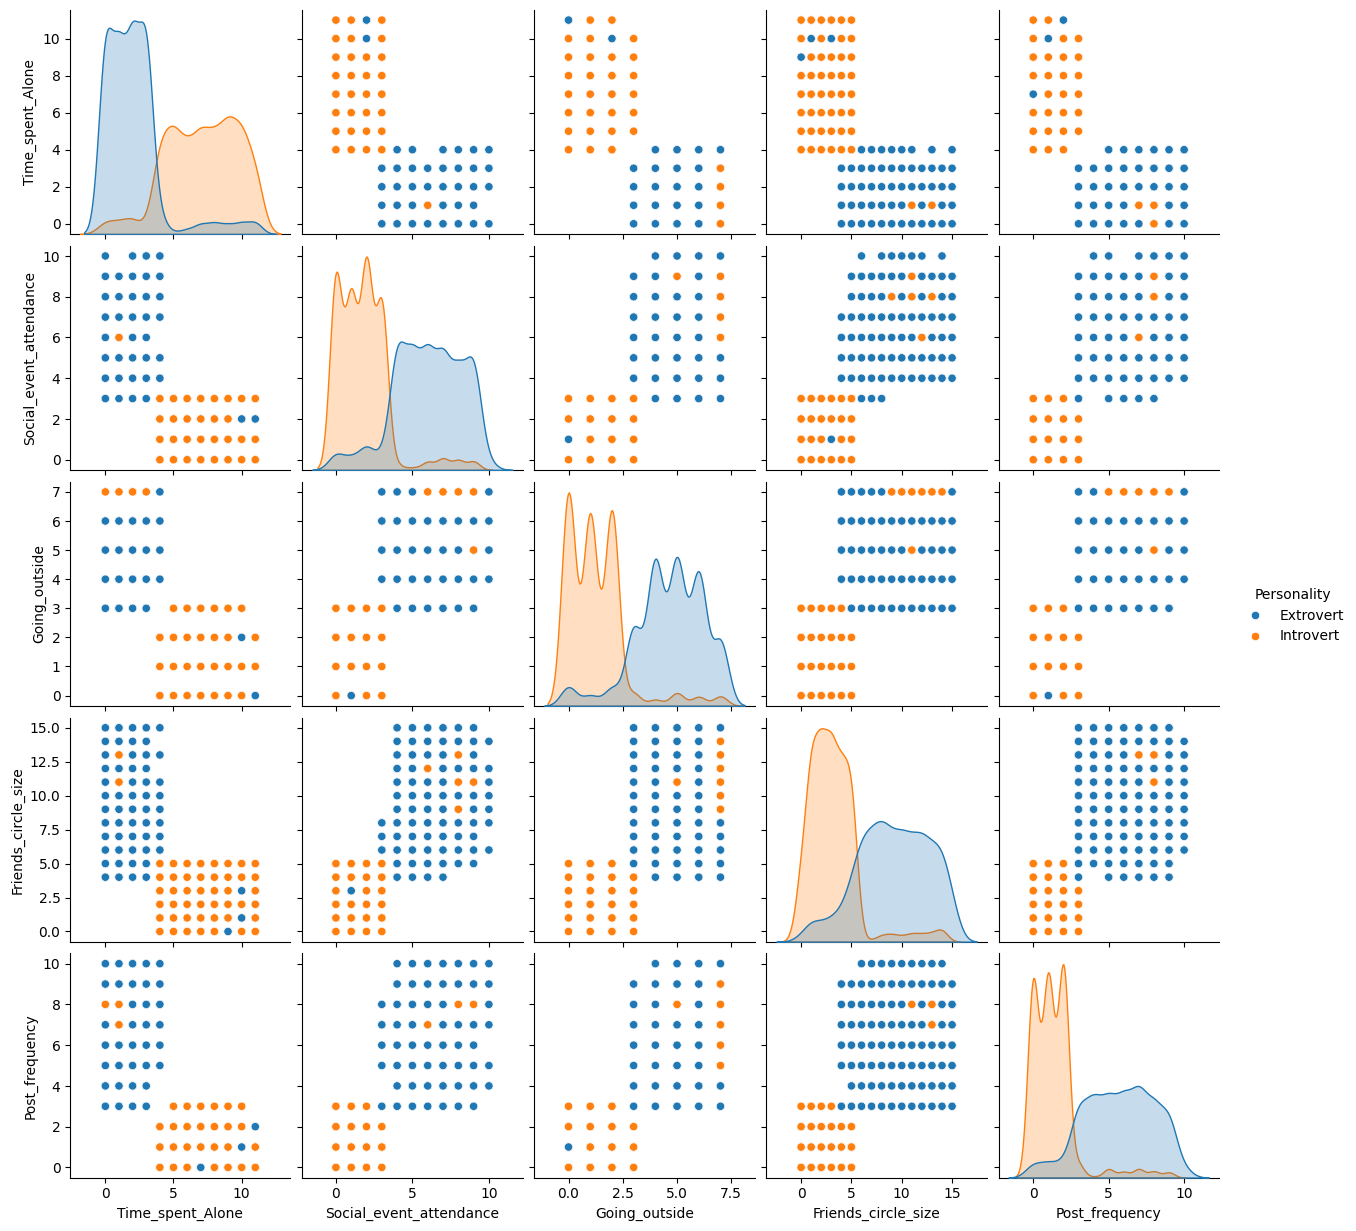

In [ ]:
sns.pairplot(df, hue='Personality')
plt.show()

Overall, the pairplot reinforces the findings from our individual feature explorations and the correlation matrix, visually demonstrating that the numerical features in our dataset are indeed highly relevant for distinguishing between extroverted and introverted personalities. The separation of the two personality types in many of the plots indicates that these features are likely to be strong predictors for the classification models.

## Preprocess the data

In [ ]:
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Percentage: {df.duplicated().sum()/before_row*100} %")

Duplicates: 388
Percentage: 13.379310344827585 %


Approximately 13.38% of the dataset consists of duplicate entries. To avoid a substantial loss of data, we chose to retain the first occurrence of each duplicate record and remove the subsequent repetitions.

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
# Encode target
label_encoder = LabelEncoder()
df['Personality'] = label_encoder.fit_transform(df['Personality'])

In [ ]:
df['Personality'].head()

,Personality
0,0
1,1
2,1
3,0
4,0


0 -- Extrovert

1 -- Introvert

We evaluated two imputation approaches on our dataset:

- SimpleImputer (median for numerical, mode for categorical features)
- KNNImputer (k-nearest neighbors-based imputation)

Both methods yielded comparable predictive performance across our evaluation metrics, with no statistically significant difference in model accuracy or validation scores.

Due to that we have selected the SimpleImputer becuase:
- Computational Efficiency: Significantly faster training and inference times
- Interpretability: Transparent, deterministic imputation rules

While KNN imputation can capture more complex feature relationships, the marginal performance gain did not justify the increased computational overhead and reduced model transparency for our use case.

In [ ]:
#Impute missing values
# Numerical features
num_imputer = SimpleImputer(strategy='median')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])
print('After Imputation of numerical features:')
print(df.isna().sum())

After Imputation of numerical features:
Time_spent_Alone              0
Stage_fear                   73
Social_event_attendance       0
Going_outside                 0
Drained_after_socializing    51
Friends_circle_size           0
Post_frequency                0
Personality                   0
dtype: int64


In [ ]:
# Imputing Categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])
print('After Imputation of categorical features:')
print(df.isna().sum())

After Imputation of categorical features:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [ ]:
for cat in categorical_columns:
  print(f'{cat}:')
  print(df[cat].unique(), '\n')

Stage_fear:
['No' 'Yes'] 

Drained_after_socializing:
['No' 'Yes'] 



In [ ]:
# Encode categorical features
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
#We modify the columns' name in df
df = df.rename(columns = {'Stage_fear_Yes': 'Stage_fear', 'Drained_after_socializing_Yes': 'Drained_after_socializing'})

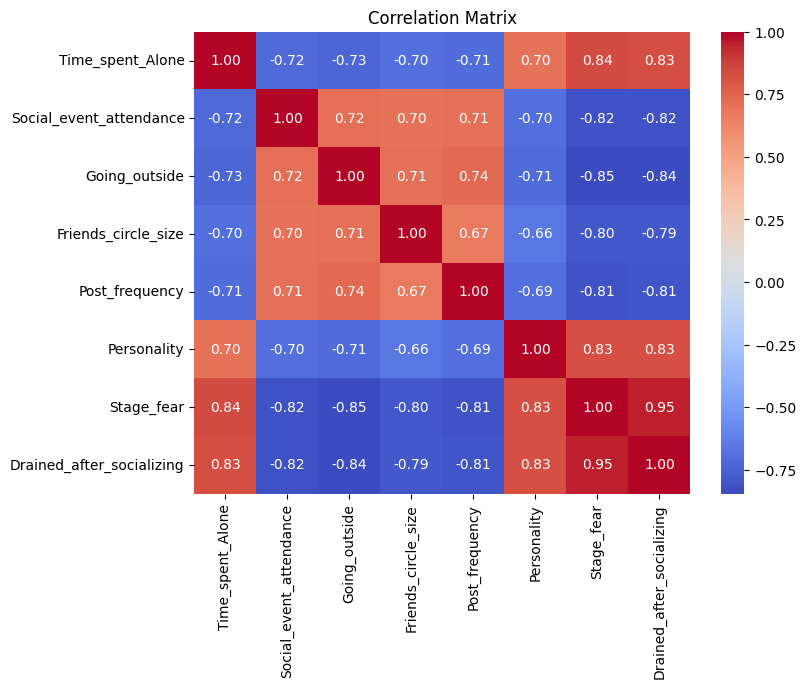

In [ ]:
# Correlation matrix with all the features and target
correlation_matrix_complete = df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_complete, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In this correlation matrix we included also categorical features and target:
- Stage_fear and Drained_after_socializing show a strong positive correlation with each other, with the target variable (Personality) and with Time_spent_Alone.
- They exhibit strong negative correlations with the remaining features, highlighting their discriminative power in separating introverts from extroverts.

## Training and Testing:

In [ ]:
# splititng dataset

X = df.drop('Personality', axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
print("Total entries: ", len(X))
print("Training entries: ", len(X_train))
print("Testing entries: ", len(X_test))

Total entries:  2512
Training entries:  1758
Testing entries:  754


We have found that test_size=0.3 is better for models performances is better than 0.2

### KNNImputation:

In [ ]:
# START HERE TO USE KNN-IMPUTER!!

'''
from sklearn.impute import KNNImputer

# Drop duplicates
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Percentage: {df.duplicated().sum()/before_row*100} %")
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum())

# Encode target
label_encoder = LabelEncoder()
df['Personality'] = label_encoder.fit_transform(df['Personality'])
# Encode categorical features
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
#We modify the columns' name in df
df = df.rename(columns = {'Stage_fear_Yes': 'Stage_fear', 'Drained_after_socializing_Yes': 'Drained_after_socializing'})

# Splitting
X = df.drop('Personality', axis=1)
y = df['Personality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# KNNImputation
KNN_imputer = KNNImputer(n_neighbors=2)
# train the KNN imputer
KNN_imputer.fit(X_train)
# Apply tranformation
X_train = KNN_imputer.transform(X_train)
X_test = KNN_imputer.transform(X_test)

# Convert back to DataFrame with original column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# check remaining NaN
print("Remaining NaN after KNNImputer:", np.isnan(X_train).sum().sum())
print(df.columns.tolist())
'''

'\nfrom sklearn.impute import KNNImputer\n\n# Drop duplicates\nprint(f"Duplicates: {df.duplicated().sum()}")\nprint(f"Percentage: {df.duplicated().sum()/before_row*100} %")\ndf = df.drop_duplicates(keep=\'first\')\nprint(df.duplicated().sum())\n\n# Encode target\nlabel_encoder = LabelEncoder()\ndf[\'Personality\'] = label_encoder.fit_transform(df[\'Personality\'])\n# Encode categorical features\ndf = pd.get_dummies(df, columns=categorical_columns, drop_first=True)\n#We modify the columns\' name in df\ndf = df.rename(columns = {\'Stage_fear_Yes\': \'Stage_fear\', \'Drained_after_socializing_Yes\': \'Drained_after_socializing\'})\n\n# Splitting\nX = df.drop(\'Personality\', axis=1)\ny = df[\'Personality\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)\n\n# KNNImputation\nKNN_imputer = KNNImputer(n_neighbors=2)\n# train the KNN imputer\nKNN_imputer.fit(X_train)\n# Apply tranformation\nX_train = KNN_imputer.transform(X_train)\n

| Model               | Dataset | Accuracy  | F1-score  | Precision | Recall    |
| ------------------- | ------- | --------- | --------- | --------- | --------- |
| Logistic Regression | Train   | 0.9253360 | 0.9253550 | 0.9253815 | 0.9253360 |
|                     | Test    | 0.9125249 | 0.9127472 | 0.9140132 | 0.9125249 |
| KNN                 | Train   | 0.9298158 | 0.9298718 | 0.9300065 | 0.9298158 |
|                     | Test    | 0.9125249 | 0.9127472 | 0.9140132 | 0.9125249 |
| Decision Tree       | Train   | 0.9333001 | 0.9333648 | 0.9335491 | 0.9333001 |
|                     | Test    | 0.9065606 | 0.9067826 | 0.9078761 | 0.9065606 |
| SVM                 | Train   | 0.9303136 | 0.9303732 | 0.9305242 | 0.9303136 |
|                     | Test    | 0.9145129 | 0.9147438 | 0.9162016 | 0.9145129 |
| Random Forest       | Train   | 0.9303136 | 0.9303732 | 0.9305242 | 0.9303136 |
|                     | Test    | 0.9145129 | 0.9147438 | 0.9162016 | 0.9145129 |


## Feature Engineering:

### Engineered Features

**1) Alone_to_Social_Ratio**

$$
\texttt{Alone_to_Social_Ratio}
=
\frac{\texttt{Time_spent_Alone}}{\texttt{Social_event_attendance} + 1}
$$

- Balance between solitude and social activity.  
- High → more time alone (introvert tendency).  
- Low → more frequent events (extrovert tendency).  

---

**2) Social_Comfort_Index**

$$
\texttt{Social_Comfort_Index}
=
\frac{\texttt{Friends_circle_size} + \texttt{Post_frequency} - \texttt{Stage_fear}}{3}
$$

- Proxy for comfort with social exposure.  
- High → large circle, frequent posting, low stage fear.  
- Low → small circle, low posting, high stage fear.  

---

**3) Social_Energy_Index**

$$
\texttt{Social_Energy_Index}
=
\big(\texttt{Social_event_attendance} + \texttt{Going_outside}\big)
-
\mathbf{1}_{\{\texttt{Drained_after_socializing}=\texttt{Yes}\}}
$$

- Net energy from social life.  
- High → socially active, not drained.  
- Low → low activity, easily drained.  

---

**4) Friendliness_Score**

$$
\texttt{Friendliness_Score}
=
\frac{\texttt{Friends_circle_size}\times\big(\texttt{Post_frequency}+1\big)}{\texttt{Stage_fear}+1}
$$

- Composite measure of sociability.  
- High → large circle, active online, little stage fear.  
- Low → small circle, low posting, high stage fear.  


In [ ]:
# feature engineering

X_train['Alone_to_Social_Ratio'] = X_train['Time_spent_Alone'] / (X_train['Social_event_attendance'] + 1)
X_test['Alone_to_Social_Ratio'] = X_test['Time_spent_Alone'] / (X_test['Social_event_attendance'] + 1)
X_train['Social_Comfort_Index'] = (X_train['Friends_circle_size'] + X_train['Post_frequency'] - X_train['Stage_fear']) / 3
X_test['Social_Comfort_Index'] = (X_test['Friends_circle_size'] + X_test['Post_frequency'] - X_test['Stage_fear']) / 3


In [ ]:
#Social Energy Index

#Combine factors reflecting energy gained or drained from social activities.

X_train['Social_Energy_Index'] = (X_train['Social_event_attendance'] + X_train['Going_outside']) - (X_train['Drained_after_socializing'] == 'Yes').astype(int)
X_test['Social_Energy_Index'] = (X_test['Social_event_attendance'] + X_test['Going_outside']) - (X_test['Drained_after_socializing'] == 'Yes').astype(int)


#Idea: Extroverts might have higher scores, introverts lower.

In [ ]:
#Friendliness Score

#Combine friends circle and posting activity with stage fear.

X_train['Friendliness_Score'] = X_train['Friends_circle_size'] * (X_train['Post_frequency'] + 1) / (X_train['Stage_fear'] + 1)
X_test['Friendliness_Score'] = X_test['Friends_circle_size'] * (X_test['Post_frequency'] + 1) / (X_test['Stage_fear'] + 1)


#This captures social activity while penalizing stage fear.

## Scaling:

In [ ]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Models training:

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree": DecisionTreeClassifier(max_depth = 5),
    "SVM": SVC(kernel='rbf',gamma="scale"),
    "Random Forest": RandomForestClassifier(n_estimators=1000, random_state=42, max_depth = 5)
}

evals = {
    "Accuracy": accuracy_score,
    "F1-score": f1_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "Confusion matrix": confusion_matrix
}

At the beginning SVM and Log Regression were the best models, while Decision Tree and Random Forest were overfitting and KNN (n_neighbors = 4) also but a bit less.
Playing with hyperparameters:
- KNN: 4 --> 10
- Decision Tree: adding max_depth=5
- Random Forest: random_state=42, n_estimators=1000, max_depth = 5

In [ ]:
def compare_models_cv():
  for name, model in models.items():
    cv_score = cross_val_score(model,X_train_scaled,y_train,cv= 5)
    meanscore = round(cv_score.mean()*100,4)

    print('Cross Validation for this model',name, '=',cv_score)
    print('Accuracy score of the ',name, ' = ', meanscore)
    print('-'*50)

In [ ]:
compare_models_cv()

Cross Validation for this model Logistic Regression = [0.93181818 0.91761364 0.91477273 0.92022792 0.92877493]
Accuracy score of the  Logistic Regression  =  92.2641
--------------------------------------------------
Cross Validation for this model KNN = [0.94034091 0.9375     0.91761364 0.93162393 0.93732194]
Accuracy score of the  KNN  =  93.288
--------------------------------------------------
Cross Validation for this model Decision Tree = [0.92897727 0.93465909 0.91761364 0.91737892 0.92877493]
Accuracy score of the  Decision Tree  =  92.5481
--------------------------------------------------
Cross Validation for this model SVM = [0.94034091 0.9375     0.91761364 0.93162393 0.93732194]
Accuracy score of the  SVM  =  93.288
--------------------------------------------------
Cross Validation for this model Random Forest = [0.94034091 0.9375     0.91761364 0.93162393 0.93732194]
Accuracy score of the  Random Forest  =  93.288
--------------------------------------------------


We evaluated five models using 5-fold cross-validation and test accuracy.



*   The cross-validation results show that all models are stable, with small variation across folds.
*   The best performing models in terms of accuracy are KNN, SVM, and Random Forest, each achieving around 93.3% accuracy.
*   Logistic Regression also performed well (~92.3%) and has the advantage of being simpler and easier to interpret.
*   Decision Tree had also performed well (~92.5%) but is more prone to overfitting compared to ensemble methods.









In [ ]:
models_evals = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Predict on TRAIN
    y_train_pred = model.predict(X_train_scaled)
    # Predict on TEST
    y_test_pred = model.predict(X_test_scaled)

    models_evals[model_name] = {
        "Train": {},
        "Test": {}
    }

    # Evaluate both train and test sets
    for dataset, (X, y_true, y_pred) in {
        "Train": (X_train_scaled, y_train, y_train_pred),
        "Test": (X_test_scaled, y_test, y_test_pred)
    }.items():

        for name_eval, eval in evals.items():
            if name_eval == "Confusion matrix":
                score = eval(y_true, y_pred)
            elif name_eval in ["F1-score", "Precision", "Recall"]:
                score = eval(y_true, y_pred, average="weighted")  # supports multi-class
            else:
                score = eval(y_true, y_pred)
            models_evals[model_name][dataset][name_eval] = score

# Print results
for model_name, results in models_evals.items():
    print(f"\n{model_name} Results:")
    for dataset in ["Train", "Test"]:
        print(f"\n{dataset} set:")
        for metric, value in results[dataset].items():
            if metric != "Confusion matrix":
                print(f"{metric}: {value:.7f}")
    print('-'*40)



Logistic Regression Results:

Train set:
Accuracy: 0.9266212
F1-score: 0.9266266
Precision: 0.9266326
Recall: 0.9266212

Test set:
Accuracy: 0.9098143
F1-score: 0.9099762
Precision: 0.9106022
Recall: 0.9098143
----------------------------------------

KNN Results:

Train set:
Accuracy: 0.9334471
F1-score: 0.9334898
Precision: 0.9335820
Recall: 0.9334471

Test set:
Accuracy: 0.9124668
F1-score: 0.9126457
Precision: 0.9134576
Recall: 0.9124668
----------------------------------------

Decision Tree Results:

Train set:
Accuracy: 0.9357224
F1-score: 0.9357637
Precision: 0.9358545
Recall: 0.9357224

Test set:
Accuracy: 0.9058355
F1-score: 0.9059924
Precision: 0.9065376
Recall: 0.9058355
----------------------------------------

SVM Results:

Train set:
Accuracy: 0.9328783
F1-score: 0.9329349
Precision: 0.9330794
Recall: 0.9328783

Test set:
Accuracy: 0.9137931
F1-score: 0.9139795
Precision: 0.9148933
Recall: 0.9137931
----------------------------------------

Random Forest Results:

Train

The models achieved remarkably similar performance levels
Our best models are:
- Support Vector Machine (SVM)
- Random Forest (RF)
- K-Nearest Neighbors (KNN)

Both SVM and Random Forest displayed identical test set performance, which strongly suggests that these algorithms are converging toward the same performance ceiling imposed by the dataset itself. Despite being fundamentally different learning paradigms (margin maximization vs. ensemble of decision trees), their predictive capacity on this dataset appears bounded by the same intrinsic data characteristics (signal-to-noise ratio, feature relevance and class separability).

This observation indicates that we may have effectively reached the performance ceiling of the dataset.

### What is going on?

In [ ]:

svm = models["SVM"].fit(X_train_scaled, y_train)
rf  = models["Random Forest"].fit(X_train_scaled, y_train)

svm_tr = svm.predict(X_train_scaled) ; svm_te = svm.predict(X_test_scaled)
rf_tr  = rf.predict(X_train_scaled)  ; rf_te  = rf.predict(X_test_scaled)

print("Train predictions equal? ", np.array_equal(svm_tr, rf_tr))
print("Test  predictions equal? ", np.array_equal(svm_te, rf_te))

# If not strictly equal, how close?
def mismatch_rate(a,b):
    return (a!=b).mean()

print("Train mismatch rate: ", mismatch_rate(svm_tr, rf_tr))
print("Test  mismatch rate: ", mismatch_rate(svm_te, rf_te))

print("\nSVM Test confusion:\n", confusion_matrix(y_test, svm_te))
print("\nRF  Test confusion:\n", confusion_matrix(y_test, rf_te))


for name, m in models.items():
    print(f"\nModel: {name} | Type: {type(m).__name__} | Object ID: {id(m)}")


# SVM sensitivity
print("\n\nSMV:")
for C in [0.2, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 22.0]:
    svm_tmp = SVC(kernel='rbf', gamma='scale', C=C).fit(X_train_scaled, y_train)
    print(f"C={C} --> test acc:", (svm_tmp.predict(X_test_scaled)==y_test).mean())

print("\nSVM gamma:")
for g in [0.01, 0.1, 1, 10]:
    svm_tmp = SVC(kernel='rbf', gamma=g, C=1).fit(X_train_scaled, y_train)
    print(f"SVM gamma={g} test acc:", (svm_tmp.predict(X_test_scaled)==y_test).mean())


# RF sensitivity
print("\nRandom Forest:")
for depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    rf_tmp = RandomForestClassifier(max_depth=depth, n_estimators=1000, random_state=42).fit(X_train_scaled, y_train)
    print(f"depth={depth} --> test acc:", (rf_tmp.predict(X_test_scaled)==y_test).mean())


Train predictions equal?  True
Test  predictions equal?  True
Train mismatch rate:  0.0
Test  mismatch rate:  0.0

SVM Test confusion:
 [[385  40]
 [ 25 304]]

RF  Test confusion:
 [[385  40]
 [ 25 304]]

Model: Logistic Regression | Type: LogisticRegression | Object ID: 137952872598752

Model: KNN | Type: KNeighborsClassifier | Object ID: 137952842413936

Model: Decision Tree | Type: DecisionTreeClassifier | Object ID: 137952879946512

Model: SVM | Type: SVC | Object ID: 137952870070608

Model: Random Forest | Type: RandomForestClassifier | Object ID: 137952872744768


SMV:
C=0.2 --> test acc: 0.9137931034482759
C=0.5 --> test acc: 0.9137931034482759
C=1.0 --> test acc: 0.9137931034482759
C=2.0 --> test acc: 0.9137931034482759
C=3.0 --> test acc: 0.9137931034482759
C=4.0 --> test acc: 0.9137931034482759
C=5.0 --> test acc: 0.9137931034482759
C=6.0 --> test acc: 0.9137931034482759
C=7.0 --> test acc: 0.9137931034482759
C=8.0 --> test acc: 0.9137931034482759
C=9.0 --> test acc: 0.913793

We experimented with a range of hyperparameter settings for both SVM and Random Forest and observed that performance remained largely unchanged across many configurations. This stability indicates that the models are relatively insensitive to these parameters.

In other words, the dataset is **highly well-structured**, with features that consistently define the decision boundaries, so multiple hyperparameter combinations yield similar outcomes. Our analysis confirms also the absence of problems linked to model memory IDs. The identical predictions and zero mismatch rates suggest that all models may have reached ceiling performance on this dataset.

## Confusion Matrix:

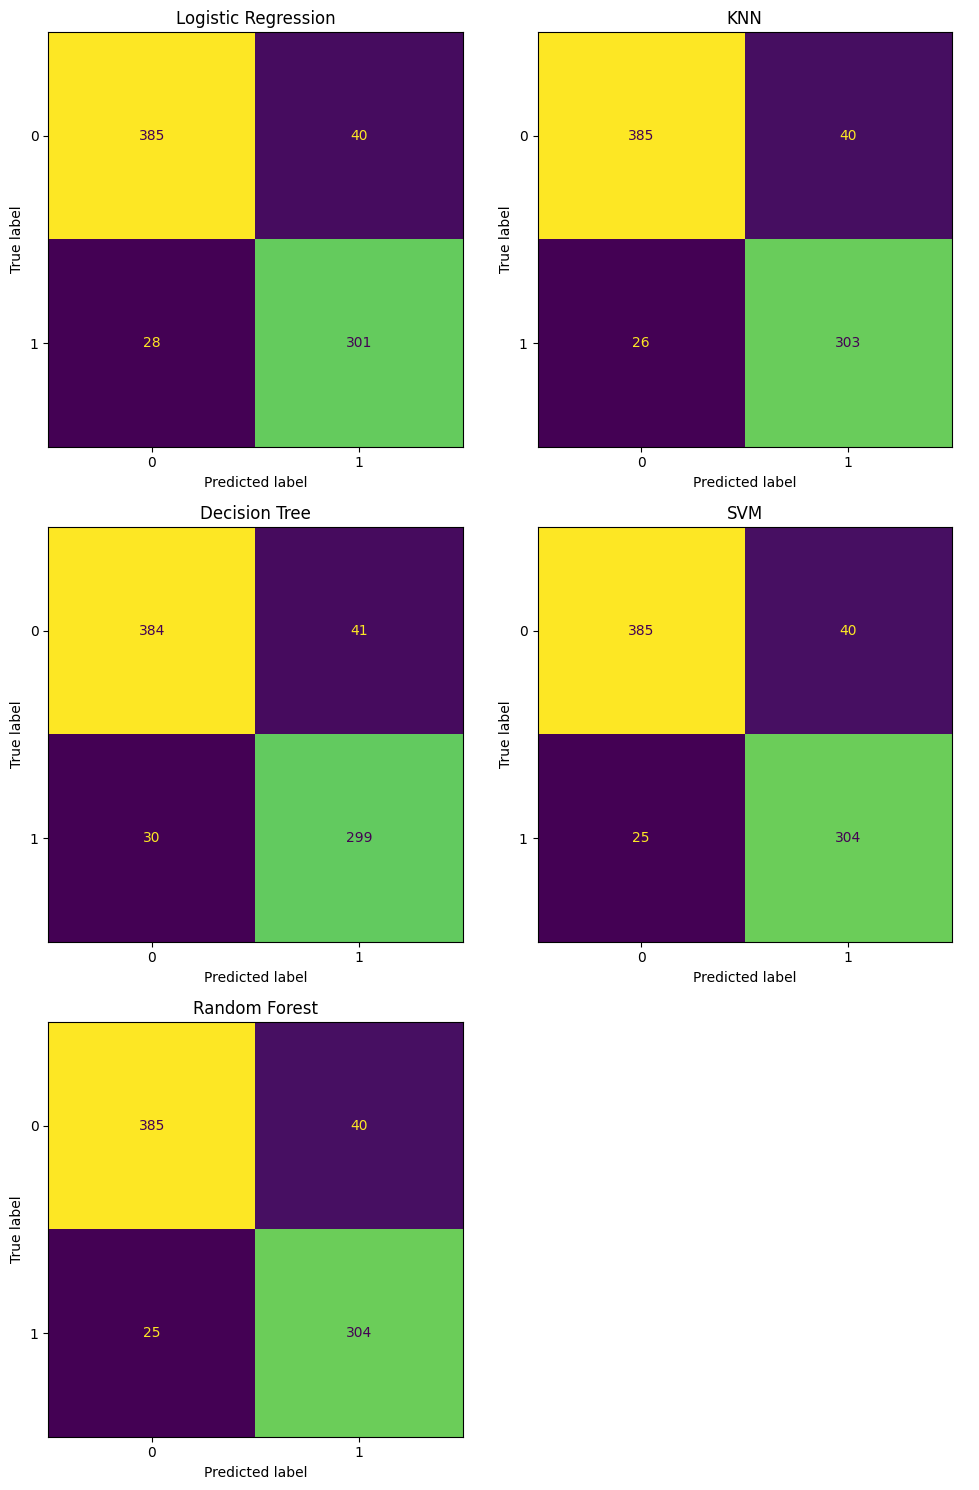

In [ ]:

# Number of models
n_models = len(models_evals)
cols = 2   # number of plots per row
rows = (n_models + cols - 1) // cols  # compute needed rows

fig, axes = plt.subplots(rows, cols, figsize=(10, 5*rows))
axes = axes.flatten()  # make it iterable easily

for ax, (model_name, eval) in zip(axes, models_evals.items()):
    disp = ConfusionMatrixDisplay(eval['Test']["Confusion matrix"])
    disp.plot(ax=ax, colorbar=False)   # plot into subplot
    ax.set_title(model_name)

# Hide unused axes if models don't fill the grid
for ax in axes[len(models_evals):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

[ TN   FP

  FN   TP ]

TN (True Negatives): correctly predicted Extroverts

FP (False Positives): predicted Introvert but actually Extrovert

FN (False Negatives): predicted Extrovert but actually Introvert

TP (True Positives): correctly predicted Introverts


Across all five models, performance is strong with high True Positives and True Negatives.

*   Logistic Regression & KNN: Solid results, but with slightly more False Negatives compared to top performers.

*   Decision Tree: Highest number of misclassifications, confirming weaker robustness.
*  SVM & Random Forest: Best-performing models, with the lowest False Negatives (25) and balanced predictions across both classes.

**Conclusion:** SVM and Random Forest provide the most reliable results, consistently minimizing misclassifications and showing the strongest overall performance.

## ROC

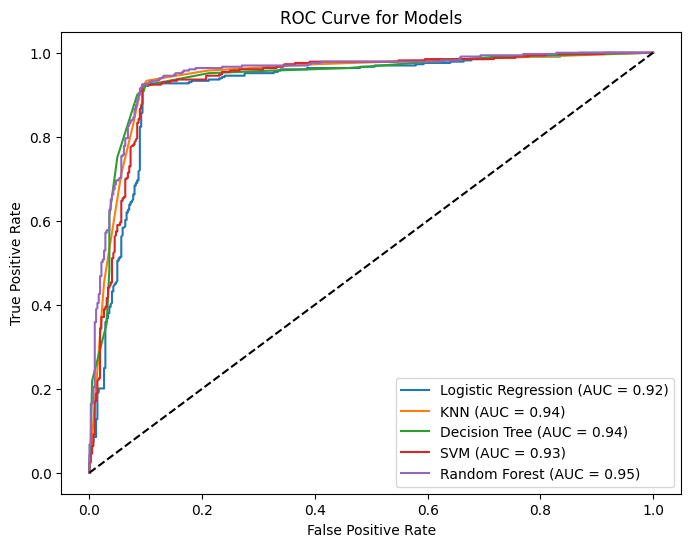

In [ ]:
plt.figure(figsize=(8, 6))

for name_model, model in models.items():
    if not hasattr(model, "predict_proba"):
        model_prob = SVC(kernel='poly', random_state=42, probability=True)
        model_prob.fit(X_train_scaled, y_train)
        y_score = model_prob.predict_proba(X_test_scaled)[:, 1]
    else:
        y_score = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name_model} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Models')
plt.legend()
plt.show()


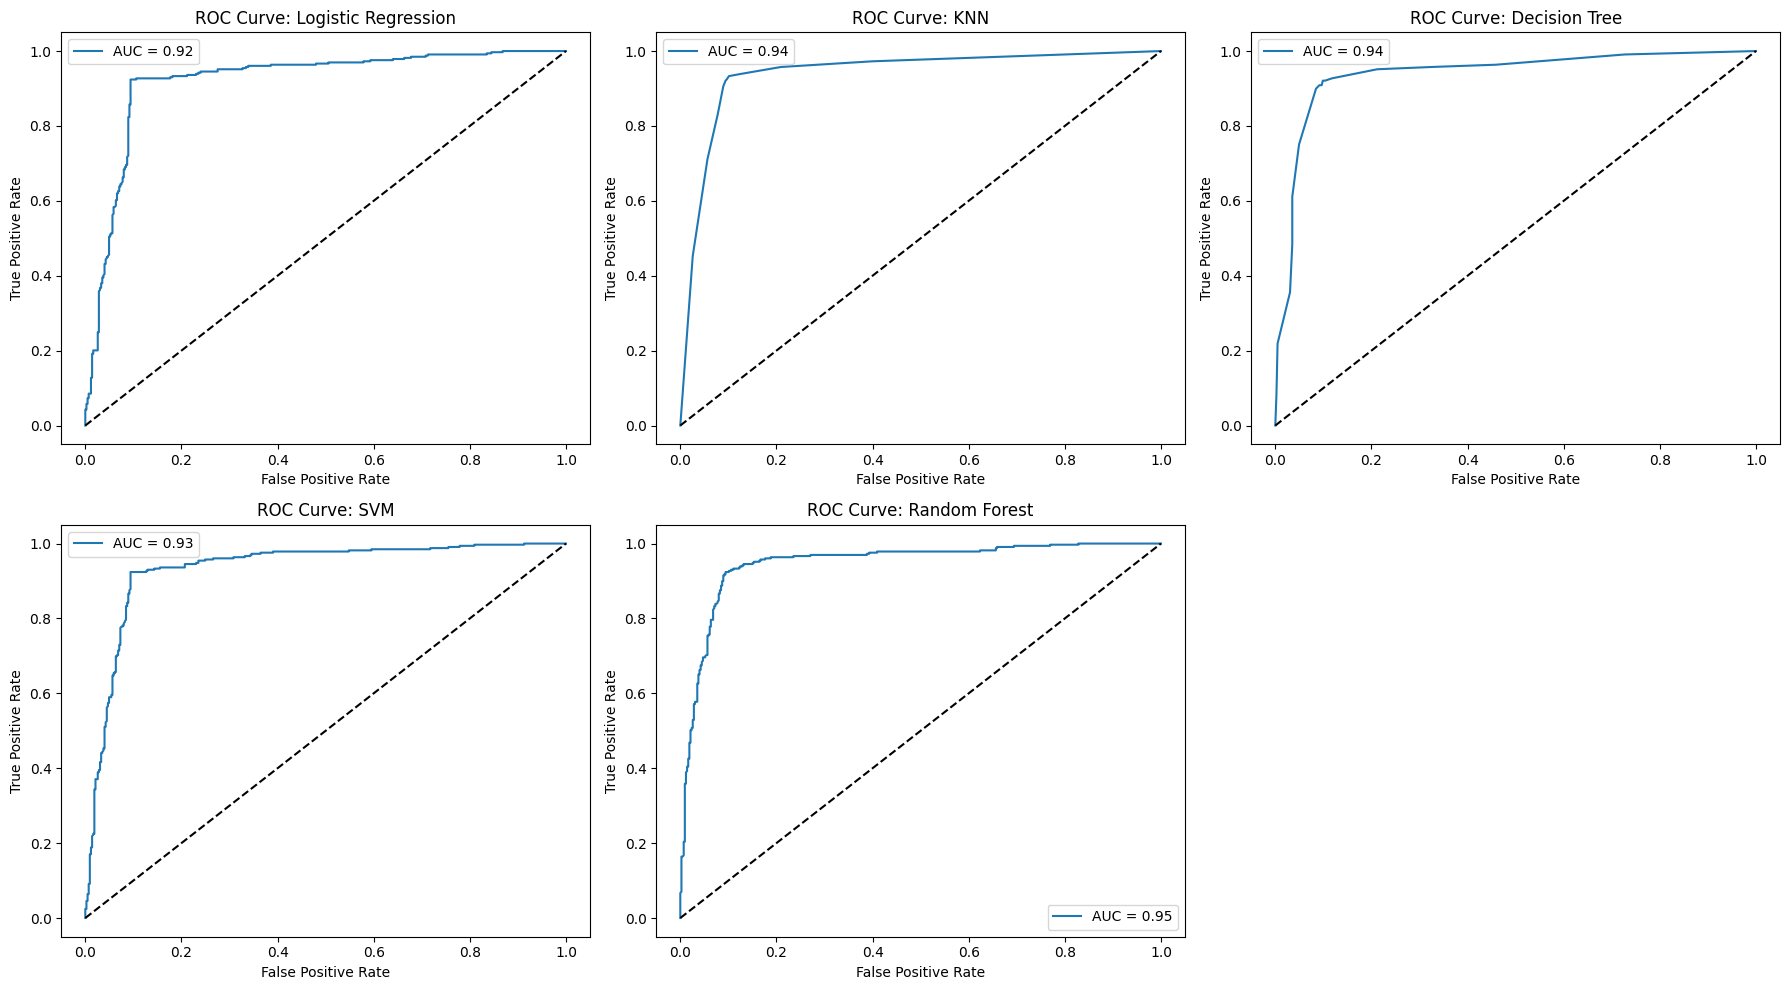

In [ ]:


n_models = len(models)
n_cols = 3
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Flatten axes array (in case of multiple rows)
axes = axes.flatten()

for i, (name_model, model) in enumerate(models.items()):
    # Handle models without predict_proba (e.g., plain SVM)
    if not hasattr(model, "predict_proba"):
        model_prob = SVC(kernel='poly', random_state=42, probability=True)
        model_prob.fit(X_train_scaled, y_train)
        y_score = model_prob.predict_proba(X_test_scaled)[:, 1]
    else:
        y_score = model.predict_proba(X_test_scaled)[:, 1]

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)

    # Plot in the corresponding subplot
    axes[i].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    axes[i].plot([0, 1], [0, 1], 'k--')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve: {name_model}')
    axes[i].legend()

# Remove unused subplot slots (if number of models isn’t multiple of n_cols)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




*   All models are performing significantly better than random chance, as their curves are well above the diagonal line.

*   The AUC values confirm this, ranging from 0.92 to 0.95. This indicates that  models have excellent discriminatory power in distinguishing between extroverts and introverts.

*   The Random Forest model appears to have the highest AUC (0.95), suggesting it has the best overall performance in terms of balancing TPR and FPR.

*   Logistic Regression, KNN, and Decision Tree also show strong performance with AUCs of 0.92, 0.94, and 0.94 respectively.


*   SVM has an AUC of 0.93, also indicating good performance.


*   The visual closeness of the curves and their high AUCs reinforce the earlier observation that most of the models achieve similar, high performance levels on this dataset.



In summary, the ROC curves and AUC values demonstrate that the models are effective at predicting personality types based on the provided features, with Random Forest showing a slight edge in overall performance.

## Feature Importance

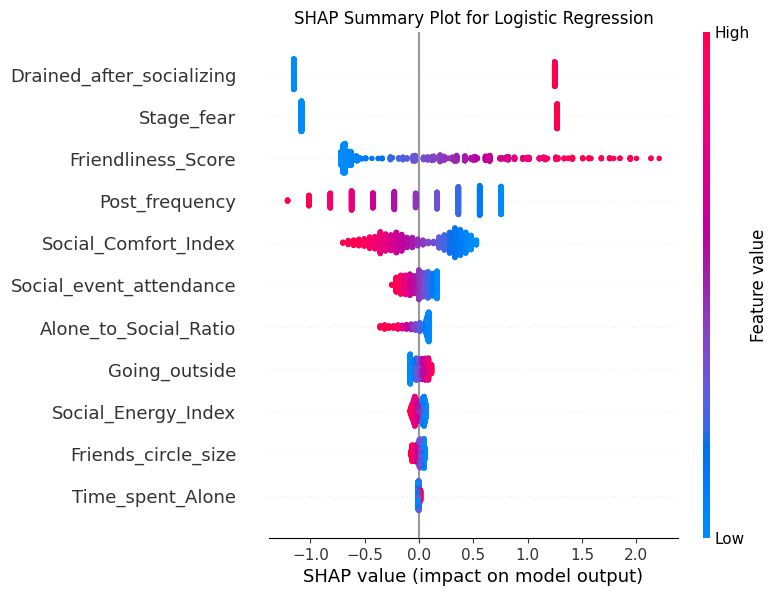

In [ ]:
# Logistic Regression
lr_model = models['Logistic Regression']
explainer_lr = shap.Explainer(lr_model, X_train_scaled)
shap_values_lr = explainer_lr(X_test_scaled)
shap.summary_plot(shap_values_lr, X_test, feature_names=X_test.columns, show=False)
plt.title('SHAP Summary Plot for Logistic Regression')
plt.show()


Key Predictors: Drained_after_socializing and Stage_fear are the strongest indicators.


*   High values (red) strongly predict Introvert.
*   Low values (blue) strongly predict Extrovert.

Engineered Feature Impact:



*   Friendliness_Score: High values (red) suggest Introvert, low values (blue) suggest Extrovert. Lower friendliness score aligns with introversion.

*   Social_Comfort_Index & Post_frequency: High values (red) lean towards Extrovert, low values (blue) towards Introvert.

Lesser Impact:

Other features like Social_event_attendance, Alone_to_Social_Ratio, Going_outside, Social_Energy_Index, Friends_circle_size, and Time_spent_Alone have less influence on predictions in this model.

  0%|          | 0/100 [00:00<?, ?it/s]

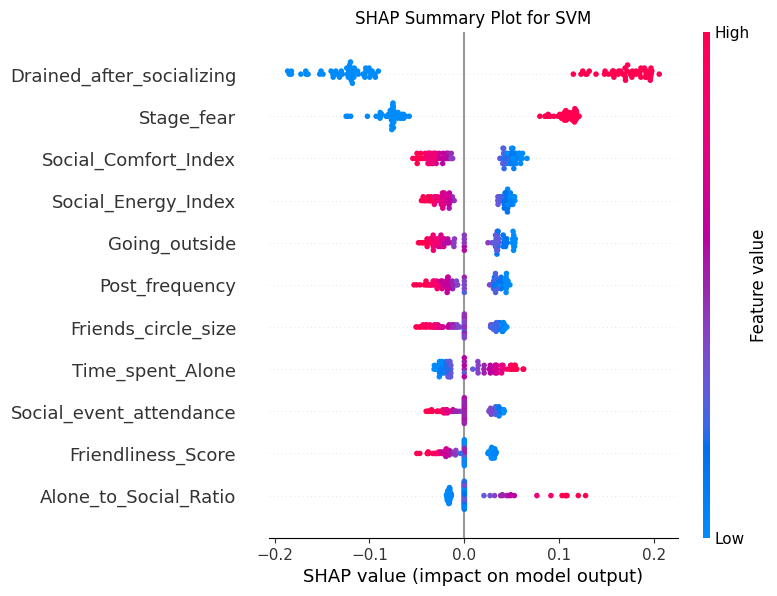

In [ ]:
svm_model = models['SVM']

# Use a small subset of training data as background for KernelExplainer
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 50, replace=False)]

explainer_svm = shap.KernelExplainer(svm_model.predict, background)
shap_values_svm = explainer_svm.shap_values(X_test_scaled[:100])  # limit to 100 samples for speed

# Summary plot
shap.summary_plot(shap_values_svm, X_test.iloc[:100], feature_names=X_test.columns, show=False)
plt.title('SHAP Summary Plot for SVM')
plt.show()


This SHAP summary plot shows the most important features in the SVM’s predictions.

The top drivers are Drained_after_socializing and Stage_fear, which strongly separate introverts and extroverts.

Other features such as social energy, comfort index, and going outside also contribute, but with smaller impact.


=== SHAP summary for class 0 ===


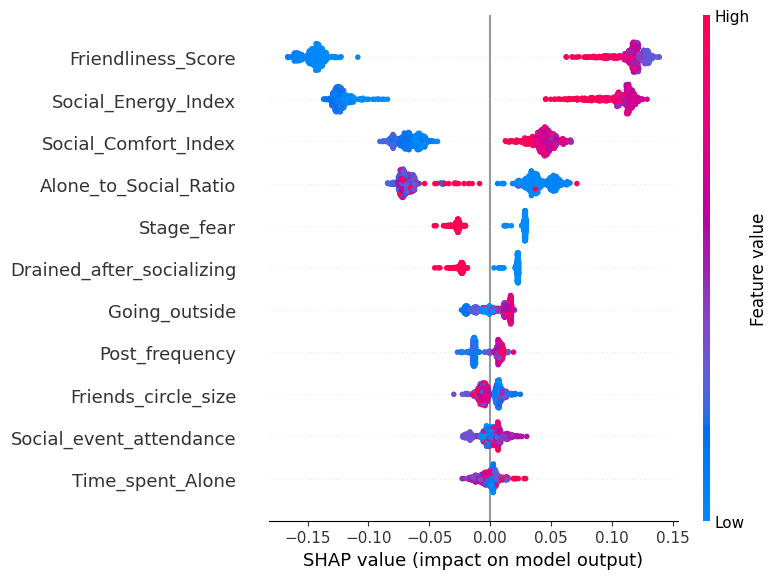


=== SHAP summary for class 1 ===


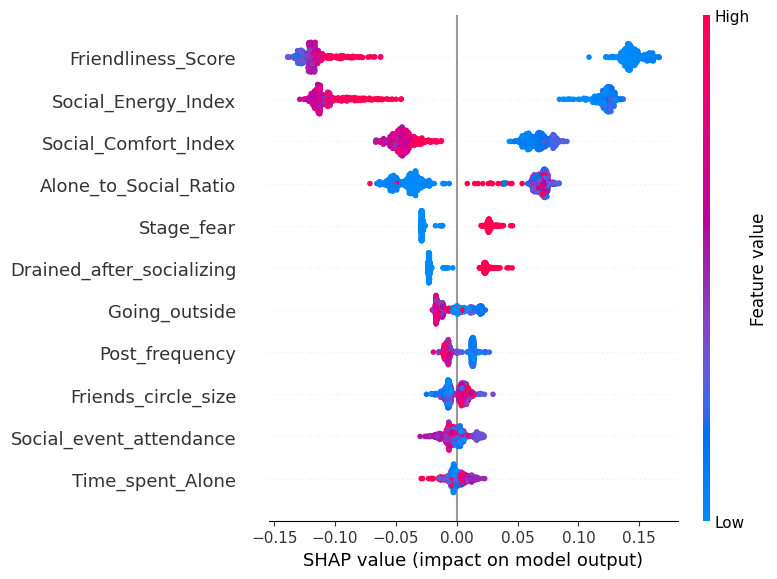

In [ ]:
# Get the trained Random Forest model
rf_model = models["Random Forest"]

# Create explainer
explainer = shap.TreeExplainer(rf_model)

# Convert test data to DataFrame with feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_scaled_df)

# Convert list of arrays to a 3D array (samples, features, classes)
shap_values_array = np.array(shap_values)  # shape: (n_samples, n_features, n_classes)

# Loop over all classes
n_classes = shap_values_array.shape[2]
for class_idx in range(n_classes):
    print(f"\n=== SHAP summary for class {class_idx} ===")

    # Extract SHAP values for the current class
    shap_values_for_class = shap_values_array[:, :, class_idx]

    # Dot summary plot
    shap.summary_plot(shap_values_for_class, X_test_scaled_df, plot_type="dot", show=True)


Looking at the SHAP summary plots for both classes, we can see a few key insights:

*   Friendliness_Score, Social_Energy_Index, and Social_Comfort_Index are consistently the most important features for both classes.


**For Class 0 (Extrovert):**

*   High values (red) of Friendliness_Score, Social_Energy_Index, and Social_Comfort_Index have positive SHAP values, meaning they strongly contribute to the prediction of an Extrovert.

*   Low values (blue) of Alone_to_Social_Ratio also have positive SHAP values, indicating that spending less time alone contributes to being an Extrovert.
*  Conversely, high values (red) of Alone_to_Social_Ratio, Stage_fear, and Drained_after_socializing have negative SHAP values, pushing the prediction away from Extrovert.


**For Class 1 (Introvert):**

*   High values (red) of Alone_to_Social_Ratio, Stage_fear, and Drained_after_socializing have positive SHAP values, strongly contributing to the prediction of an Introvert.

*   Low values (blue) of Friendliness_Score, Social_Energy_Index, and Social_Comfort_Index have positive SHAP values, indicating that lower scores in these areas contribute to being an Introvert.
*   Conversely, high values (red) of Friendliness_Score, Social_Energy_Index, and Social_Comfort_Index have negative SHAP values, pushing the prediction away from Introvert.







## Personality Prediction!

In [ ]:

print('Hello welcome to Personality Prediction!')
print('I am here to predict your "Personality" type based on your personality traits.')
print('You will answer 7 questions. Please rate yourself using numerical values only!')

# Get user input
Time_spent_Alone = float(input('1. How much time have you spent alone? (0 = none, 10 = extreme): '))
Stage_fear = float(input('2. Do you have stage fear? (0 = none, 10 = extreme): '))
Social_event_attendance = float(input('3. How many social events have you attended in the last few months? (0–10): '))
Going_outside = float(input('4. How often do you go outside? (0 = never, 10 = very often): '))
Drained_after_socializing = float(input('5. Do you feel drained after socializing? (0 = not at all, 10 = extremely): '))
Friends_circle_size = float(input('6. How many close friends do you have? (0–15): '))
Post_frequency = float(input('7. How often do you post on social media per week? (0–10): '))

# Combine input into a DataFrame
input_data = pd.DataFrame([[
    Time_spent_Alone,
    Stage_fear,
    Social_event_attendance,
    Going_outside,
    Drained_after_socializing,
    Friends_circle_size,
    Post_frequency
]], columns=[
    'Time_spent_Alone',
    'Stage_fear',
    'Social_event_attendance',
    'Going_outside',
    'Drained_after_socializing',
    'Friends_circle_size',
    'Post_frequency'
])

# Convert categorical-like numerical inputs to boolean for engineered features calculation
input_data['Stage_fear'] = input_data['Stage_fear'].apply(lambda x: True if x > 5 else False) # Assuming > 5 is 'Yes'
input_data['Drained_after_socializing'] = input_data['Drained_after_socializing'].apply(lambda x: True if x > 5 else False) # Assuming > 5 is 'Yes'


# Apply feature engineering steps to the user input
input_data['Alone_to_Social_Ratio'] = input_data['Time_spent_Alone'] / (input_data['Social_event_attendance'] + 1)
input_data['Social_Comfort_Index'] = (input_data['Friends_circle_size'] + input_data['Post_frequency'] - input_data['Stage_fear'].astype(int)) / 3
input_data['Social_Energy_Index'] = (input_data['Social_event_attendance'] + input_data['Going_outside']) - (input_data['Drained_after_socializing'].astype(int))
input_data['Friendliness_Score'] = input_data['Friends_circle_size'] * (input_data['Post_frequency'] + 1) / (input_data['Stage_fear'].astype(int) + 1)


# Ensure columns are in the same order as X_train
input_data = input_data[X_train.columns]

# Apply standardization
std_data = scaler.transform(input_data)

# Make predictions with different models
print('\n--- Personality Prediction Results ---')

# Logistic Regression
lr_classifier = models['Logistic Regression']
lr_prediction = lr_classifier.predict(std_data)
print(f"Logistic Regression Prediction: {'Extrovert' if lr_prediction[0] == 0 else 'Introvert'}")

# SVM
svm_classifier = models['SVM']
svm_prediction = svm_classifier.predict(std_data)
print(f"SVM Prediction: {'Extrovert' if svm_prediction[0] == 0 else 'Introvert'}")

# Random Forest
rf_classifier = models['Random Forest']
rf_prediction = rf_classifier.predict(std_data)
print(f"Random Forest Prediction: {'Extrovert' if rf_prediction[0] == 0 else 'Introvert'}")

Hello welcome to Personality Prediction!
I am here to predict your "Personality" type based on your personality traits.
You will answer 7 questions. Please rate yourself using numerical values only!
1. How much time have you spent alone? (0 = none, 10 = extreme): 10
2. Do you have stage fear? (0 = none, 10 = extreme): 8
3. How many social events have you attended in the last few months? (0–10): 6
4. How often do you go outside? (0 = never, 10 = very often): 8
5. Do you feel drained after socializing? (0 = not at all, 10 = extremely): 2
6. How many close friends do you have? (0–15): 3
7. How often do you post on social media per week? (0–10): 5

--- Personality Prediction Results ---
Logistic Regression Prediction: Extrovert
SVM Prediction: Extrovert
Random Forest Prediction: Introvert


This is the demonstration of our ML model in practice. After training and testing multiple classifiers (Logistic Regression, SVM, and Random Forest), we developed an interactive script where a user answers personality-related questions.

The user input is preprocessed using the same pipeline as the training data and then passed into the trained models. The system predicts whether the individual is more likely to be an Introvert or an Extrovert.

This demonstration not only shows how the model can be applied to real user input, but also highlights that even though models like SVM and Random Forest may achieve similar accuracy scores, their predictions on the same data can differ. This underlines the importance of considering both performance metrics and model behavior when selecting a final model for deployment.

## Conclusion

Overall, we achieved strong performance scores across all five models. However, we observed that Random Forest and SVM may have reached their performance ceiling with the current dataset version. To further improve model performance, we can consider the following approaches:

**Improvements:**
- **Enhanced hyperparameter tuning**: Implement more comprehensive grid search or Bayesian optimisation techniques to find optimal parameter combinations
- **Advanced feature engineering**: Create interaction terms, polynomial features, or domain-specific transformations that better capture underlying patterns
- **Model diversification**: Explore additional algorithms such as gradient boosting methods (XGBoost, LightGBM), neural networks or ensemble techniques
- **Data enhancement**: Collect additional training samples or external data sources to provide more learning opportunities